# GBM Classifier - Baseline Model

In [63]:
#Importing the libraries
import numpy as np
import pandas as pd


import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, log_loss
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split


# Import and suppress warnings
import warnings
warnings.filterwarnings('ignore')

## Step 1 - Loading Dataset

In [64]:
#Importing  the Dataset

attrition = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [65]:
attrition.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [66]:
attrition.shape

(1470, 35)

In [67]:
attrition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [68]:
attrition.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [69]:
attrition.describe(include='O')

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


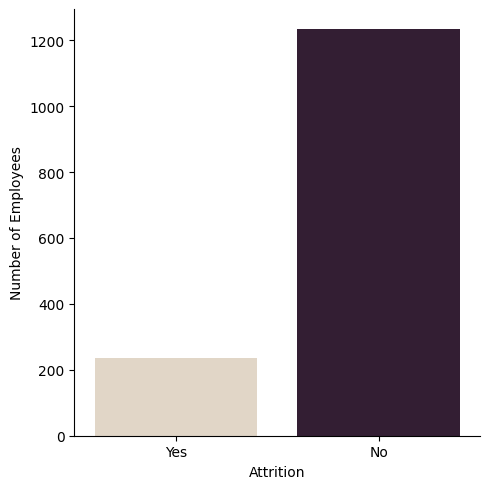

In [72]:
#Checking the number of 'Yes' and 'No' in 'Attrition'
ax = sns.catplot(x="Attrition", kind="count", palette="ch:.25", data=attrition);
ax.set(xlabel = 'Attrition', ylabel = 'Number of Employees')
plt.show()

In [73]:
#Identifying columns with missing information
missing_col = attrition.columns[attrition.isnull().any()].values
print('The missing columns in the dataset are: ',missing_col)

The missing columns in the dataset are:  []


In [74]:
attrition.isnull().sum()

,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0
EmployeeNumber,0


# Feature Engineering & Categorical Encoding

In [75]:
attrition.dtypes

,0
Age,int64
Attrition,object
BusinessTravel,object
DailyRate,int64
Department,object
DistanceFromHome,int64
Education,int64
EducationField,object
EmployeeCount,int64
EmployeeNumber,int64


In [76]:
#Extracting the Numeric and Categorical features

attrition_num = pd.DataFrame(data = attrition.select_dtypes(include = ['int64']))
attrition_cat = pd.DataFrame(data = attrition.select_dtypes(include = ['object']))
print("Shape of Numeric: ",attrition_num.shape)
print("Shape of Categorical: ",attrition_cat.shape)

Shape of Numeric:  (1470, 26)
Shape of Categorical:  (1470, 9)


In [77]:
attrition_num.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [78]:
attrition_cat.columns

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

In [79]:
# drop the dependent column from the categorical frame

attrition_cat = attrition_cat.drop(['Attrition'], axis=1) # Dropping the target column

In [80]:
attrition_cat.head()

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No


### Encoding Categorical Fields

The categorical fields have been encoded using the get_dummies() function of Pandas.

In [81]:

#Encoding using Pandas' get_dummies
attrition_cat_encoded = pd.get_dummies(attrition_cat , dtype=int)
attrition_cat_encoded.head(5)

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,0,0,1,0,0,1,0,1,0,0,...,0,0,1,0,0,0,1,1,0,1
1,0,1,0,0,1,0,0,1,0,0,...,0,1,0,0,0,1,0,1,1,0
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,1
3,0,1,0,0,1,0,0,1,0,0,...,0,1,0,0,0,1,0,1,0,1
4,0,0,1,0,1,0,0,0,0,1,...,0,0,0,0,0,1,0,1,1,0


In [82]:

print("Shape of Numeric columns after scaling :" , attrition_num.shape)
print("Shape of Categorical columns after scaling :" , attrition_cat_encoded.shape)

Shape of Numeric columns after scaling : (1470, 26)
Shape of Categorical columns after scaling : (1470, 29)


In [83]:
#Combining the Categorical and Numeric features

attrition_final_df = pd.concat([attrition_num,attrition_cat_encoded], axis = 1)
print("Shape of final dataframe: ",attrition_final_df.shape)

Shape of final dataframe:  (1470, 55)


In [84]:
attrition_final_df.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,41,1102,1,2,1,1,2,94,3,2,...,0,0,1,0,0,0,1,1,0,1
1,49,279,8,1,1,2,3,61,2,2,...,0,1,0,0,0,1,0,1,1,0
2,37,1373,2,2,1,4,4,92,2,1,...,0,0,0,0,0,0,1,1,0,1
3,33,1392,3,4,1,5,4,56,3,1,...,0,1,0,0,0,1,0,1,0,1
4,27,591,2,1,1,7,1,40,3,1,...,0,0,0,0,0,1,0,1,1,0


In [85]:
#Extracting the target variable - 'Attrition'
target = attrition['Attrition']

#Mapping 'Yes' to 1 and 'No' to 0
map = {'Yes':1, 'No':0}
target = target.apply(lambda x: map[x])

print("Shape of target: ",target.shape)

X = attrition_final_df #Features
y = target #Target

Shape of target:  (1470,)


### Train and Test Split

The data is next split into training and test dataset using the train_test_split functionality of sklearn.

In [86]:

# Split data into train and test sets as well as for validation and testing

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.75,random_state=0);
print("Shape of X Train: ",X_train.shape)
print("Shape of X Test: ",X_test.shape)
print("Shape of y Train: ",y_train.shape)
print("Shape of y Test: ",y_test.shape)

Shape of X Train:  (1102, 55)
Shape of X Test:  (368, 55)
Shape of y Train:  (1102,)
Shape of y Test:  (368,)


# Step 3 - Model Fitting

## GBM Classifier

1.n_estimators - No of Trees in the Model

2.max_features - The number of features to consider while searching for a best split.Thumb Rule to have Square root of no of Columns

3.max_depth - Maximum Depth of Tree and can be used to control overfiting

4.min_samples_leaf - Minimum samples (or observations) required in a terminal node or leaf.In general we need to have lower values for it for Imbalanced problems

5.subsample- The fraction of samples to be used for fitting the individual base learners

6.learning_rate - Learning rate shrinks the contribution of each tree by learning_rate. There is a trade-off between learning_rate and n_estimators


In [87]:
gb = GradientBoostingClassifier(random_state=100) # default
gb.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 100,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [88]:
# Fit the model to our train and target

gb.fit(X_train, y_train)


GradientBoostingClassifier(random_state=100)

In [89]:
# Get our predictions

gb_predictions = gb.predict(X_test)

In [90]:
gb_predictions_prob = gb.predict_proba(X_test)
gb_predictions_prob

array([[0.95425715, 0.04574285],
       [0.96266164, 0.03733836],
       [0.86753512, 0.13246488],
       [0.93446343, 0.06553657],
       [0.11595517, 0.88404483],
       [0.69684147, 0.30315853],
       [0.64887562, 0.35112438],
       [0.95196738, 0.04803262],
       [0.97038412, 0.02961588],
       [0.86642399, 0.13357601],
       [0.94437031, 0.05562969],
       [0.91453905, 0.08546095],
       [0.97008856, 0.02991144],
       [0.30172989, 0.69827011],
       [0.94679291, 0.05320709],
       [0.98937899, 0.01062101],
       [0.94587557, 0.05412443],
       [0.93925719, 0.06074281],
       [0.94572155, 0.05427845],
       [0.92824768, 0.07175232],
       [0.63031267, 0.36968733],
       [0.95095032, 0.04904968],
       [0.96466225, 0.03533775],
       [0.97249008, 0.02750992],
       [0.58256377, 0.41743623],
       [0.75837581, 0.24162419],
       [0.95692266, 0.04307734],
       [0.97394765, 0.02605235],
       [0.25660257, 0.74339743],
       [0.96627476, 0.03372524],
       [0.

In [91]:
gb_predictions_prob.shape

(368, 2)

In [92]:
accuracy_score(y_test, gb_predictions)

0.8831521739130435

### Feature Importance Gradient Boosting Model

In [93]:
gb.feature_importances_

array([0.06637792, 0.05983319, 0.03073138, 0.00432084, 0.        ,
       0.03919363, 0.03440223, 0.01631039, 0.03338705, 0.03211924,
       0.02486999, 0.10512298, 0.02358167, 0.0315579 , 0.02005508,
       0.        , 0.01282365, 0.        , 0.04186334, 0.04785753,
       0.00786869, 0.02921662, 0.02106675, 0.01094337, 0.02410598,
       0.05802124, 0.00119296, 0.02512782, 0.        , 0.        ,
       0.00334557, 0.00150605, 0.0042737 , 0.0005249 , 0.00822779,
       0.00420823, 0.0016531 , 0.0043053 , 0.00052944, 0.00090874,
       0.00121754, 0.00014525, 0.01109724, 0.        , 0.00334464,
       0.        , 0.00517715, 0.01111343, 0.01076333, 0.00311429,
       0.00155062, 0.01744231, 0.        , 0.05672568, 0.04687427])

In [100]:
import plotly.graph_objects as go
import plotly.io as pio
from IPython.display import display
import pandas as pd # Make sure pandas is imported

# Assuming gb and attrition_final_df are already defined

# Scatter plot

pio.renderers.default = 'colab'  # Force Colab renderer (optional, but recommended)

trace = go.Scatter(
    y = gb.feature_importances_,
    x = attrition_final_df.columns.values,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1.3,
        size = 12,
        color = gb.feature_importances_,
        colorscale='Portland',
        showscale=True
    ),
    text = attrition_final_df.columns.values
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'GBM Model Feature Importance',
    hovermode= 'closest',
     xaxis= dict(
         ticklen= 5,
         showgrid=False,
        zeroline=False,
        showline=False
     ),
    yaxis=dict(
        title= 'Feature Importance',
        showgrid=False,
        zeroline=False,
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
display(fig)